<a href="https://colab.research.google.com/github/earo12/Credit-Score-Classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [11]:
df_train = pd.read_csv('train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [14]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [15]:
print(f'Shape of train data: {df_train.shape}')

Shape of train data: (100000, 28)


In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [17]:
df_copy_train = df_train.copy()

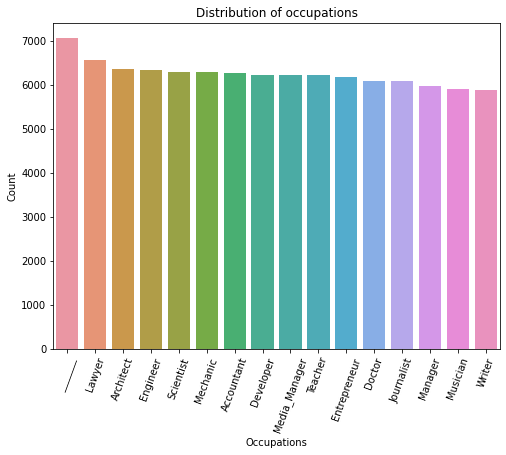

In [37]:
values_oc = df_copy_train['Occupation'].value_counts()
plt.figure(figsize = (8, 6))
sns.barplot(data = df_copy_train, x = values_oc.index, y = values_oc.values)
plt.xlabel('Occupations')
plt.xticks(rotation = 70)
plt.ylabel('Count')
plt.title('Distribution of occupations')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


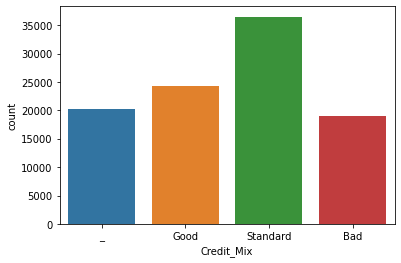

In [39]:
sns.countplot(df_copy_train['Credit_Mix'])
plt.show()

In [ ]:
df_copy_train.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'], axis = 1, inplace = True)

In [ ]:
print(f'Number of duplicates in train:{df_copy_train.duplicated().sum()}')

Number of duplicates in train:0


In [ ]:
df_copy_train['Num_Bank_Accounts'] = df_copy_train['Num_Bank_Accounts'].apply(lambda x : abs(x))

In [ ]:
df_copy_train['Num_Credit_Card'].replace(0, 1, inplace = True)

In [ ]:
df_copy_train['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True) #because we have NM values we must change them to No values

In [ ]:
df_copy_train['Payment_Behaviour'].value_counts() #Here we have some strange values like !@9#%8  

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
df_copy_train['Payment_Behaviour'].replace('!@9#%8', inplace = True)

In [ ]:
sns.barplot(data = df_copy_train['Occupation'])
plt.xlabel('Job')
plt.ylabel('Values')
plt.xticks(rotation = 45)
plt.title('Job occupations')
plt.show()

ValueError: ignored

In [ ]:
df_copy_train['Occupation'].replace('_______', inplace = True) #since we have values like '_______' we must replace them

In [ ]:
df_copy_train['Occupation'].value_counts()

Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64

In [ ]:
df_copy_train['Credit_Mix'].replace('_', inplace = True) #like in the previous one we have to replace this part of '_' value   

In [ ]:
df_copy_train['Credit_Mix'].value_counts()

Standard    45820
Good        30351
Bad         23828
_               1
Name: Credit_Mix, dtype: int64

In [ ]:
sns.countplot(data = df_copy_train['Credit_Mix'])
#plt.xticks(rotation = 45)
plt.xlabel('Credit Mix')
plt.ylabel('Values')
plt.show()

In [ ]:
#since we can't put this one we have to change them,by using the next map:
m = {'Bad':0, 'Standard':1, 'Good':2, '-':np.nan}
df_copy_train['Credit_Mix'] = df_copy_train['Credit_Mix'].map(m)

Handling outliers

In [ ]:
nums = df_copy_train.select_dtypes(exclude = 'object').columns[1:]
nums

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [ ]:
df_copy_train['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

In [ ]:
impute = SimpleImputer(strategy = 'most_frequent')
impute.fit(df_copy_train[['Payment_Behaviour']])
df_copy_train[['Payment_Behaviour']] = impute.transform(df_copy_train[['Payment_Behaviour']])


In [ ]:
m = {'Poor' : 0, 'Standard' : 1, 'Good' : 2}
df_copy_train['Credit_Score'] = df_copy_train['Credit_Score'].map(m)
df_copy_train['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

1.0    45820
2.0    30351
0.0    23828
Name: Credit_Mix, dtype: int64